# 데이터 정리

In [ ]:
# 한글
# !apt-get install fonts-nanum* -qq
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#데이터 읽기
result = pd.read_csv('기타휴게음식점_정제.csv')

In [ ]:
result2 = pd.read_csv('원두수입량.csv')

In [ ]:
df2 = pd.DataFrame(result)
df_bean2 = pd.DataFrame(result2)

In [ ]:
# 원본 파일을 유지하기 위해 복사본 사용
df = df2.copy()
df_bean = df_bean2.copy()

In [ ]:
# 컬럼명 정리
df = df.rename(columns = {'cofe_open_closed_bean.year' : 'year',
                     'cofe_open_closed_bean.month' : 'month',
                     'cofe_open_closed_bean.open_number' : 'open',
                     'cofe_open_closed_bean.closed_number' : 'closed',
                     'cofe_open_closed_bean.bean_w': 'bean'})

In [ ]:
# 시간순으로 정렬
df = df.sort_values(['year', 'month'])

In [ ]:
# 커피 수입 데이터 추가
df['bean']=df_bean['당월-수입-중량']

In [ ]:
# 시간데이터를 하나로 합침
df['date'] = df['year'].astype(str) + '년' + df['month'].astype(str) +'월'

# 시계열 데이터 시각화

In [ ]:
# 한글 폰트 사용을 위해 경로 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
sys_font = fm.findSystemFonts()
font_path = sys_font[1]
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

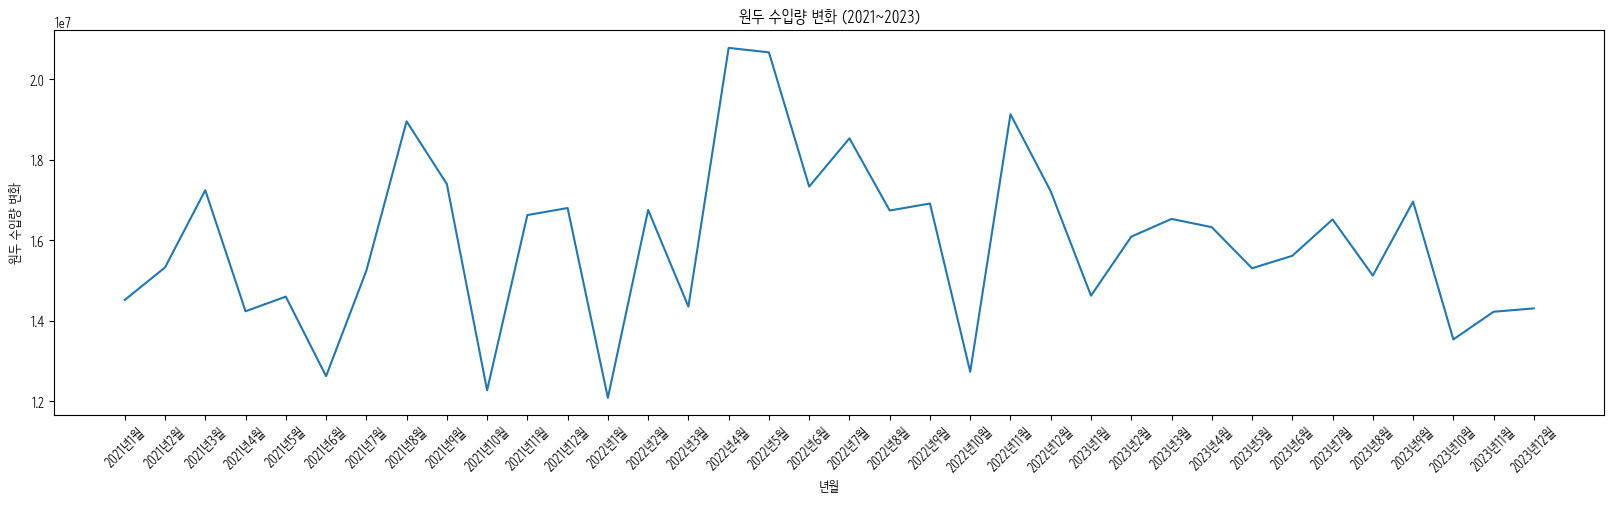

In [ ]:
# 2021~2023년 커피 수입량 변화 추이 확인
plt.figure(figsize=(20,5))
sns.lineplot(data=df, x='date', y = 'bean')
plt.xticks(rotation=45)
plt.title('커피 수입량 변화 (2021~2023)')
plt.xlabel('년월')
plt.ylabel('커피 수입량 변화')
plt.show()

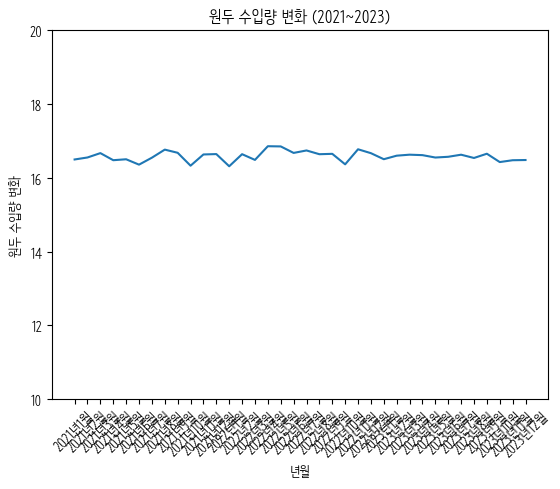

In [ ]:
# 특정년도 스케일이 커서 다른 년도의 결과를 확인하기 힘들 경우 사용
# 현재 년도별 수입량 변화를 보는 것이 목적이므로 데이터 값 차이가 크더라도 로그 변환은 하지 않아도 무방
# df['log_bean'] = np.log(df['bean'])
# sns.lineplot(data=df, x='date', y = 'log_bean')
# plt.ylim(10, 20)  # y 축 범위를 0부터 시작하도록 지정
# plt.xticks(rotation=45)
# plt.title('원두 수입량 변화 (2021~2023)')
# plt.xlabel('년월')
# plt.ylabel('원두 수입량 변화')
# plt.show()

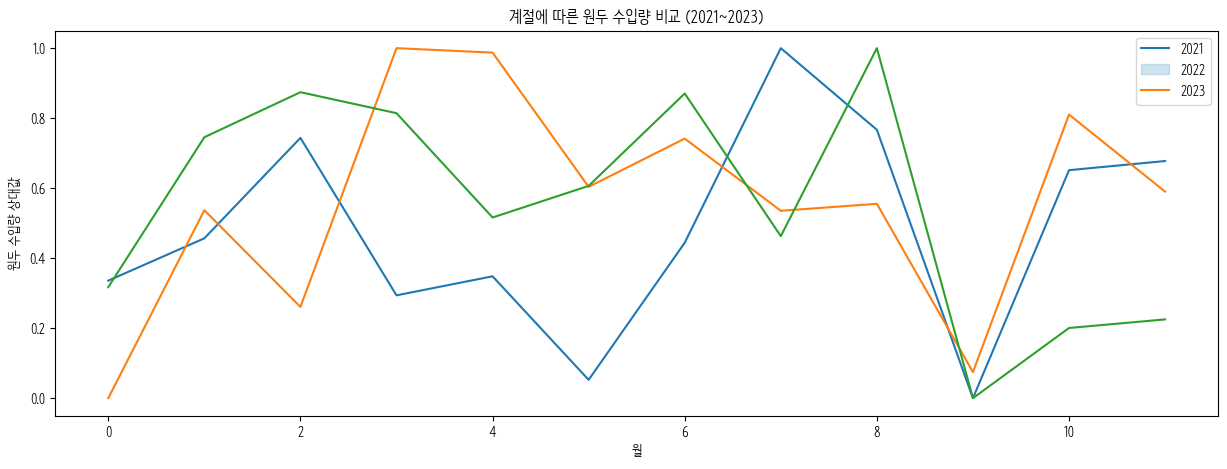

In [ ]:
# 년도별 비교를 위해 모든 데이터를 정규화
scaler = MinMaxScaler()
df_2021 = pd.DataFrame(scaler.fit_transform(df[df['year'] == 2021]['bean'].values.reshape(-1, 1)), columns=['2021'])
df_2022 = pd.DataFrame(scaler.fit_transform(df[df['year'] == 2022]['bean'].values.reshape(-1, 1)), columns=['2022'])
df_2023 = pd.DataFrame(scaler.fit_transform(df[df['year'] == 2023]['bean'].values.reshape(-1, 1)), columns=['2023'])

new_df = pd.concat([df_2021, df_2022, df_2023], axis=1)

new_df['month'] = ['01','02','03','04','05','06','07','08','09','10','11','12']

#그래프 시각화
plt.figure(figsize=(15,5))
sns.lineplot(data=new_df, dashes=False)
plt.title('계절에 따른 원두 수입량 비교 (2021~2023)')
plt.xlabel('월')
plt.ylabel('원두 수입량 상대값')
plt.legend(labels=['2021', '2022', '2023'])
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


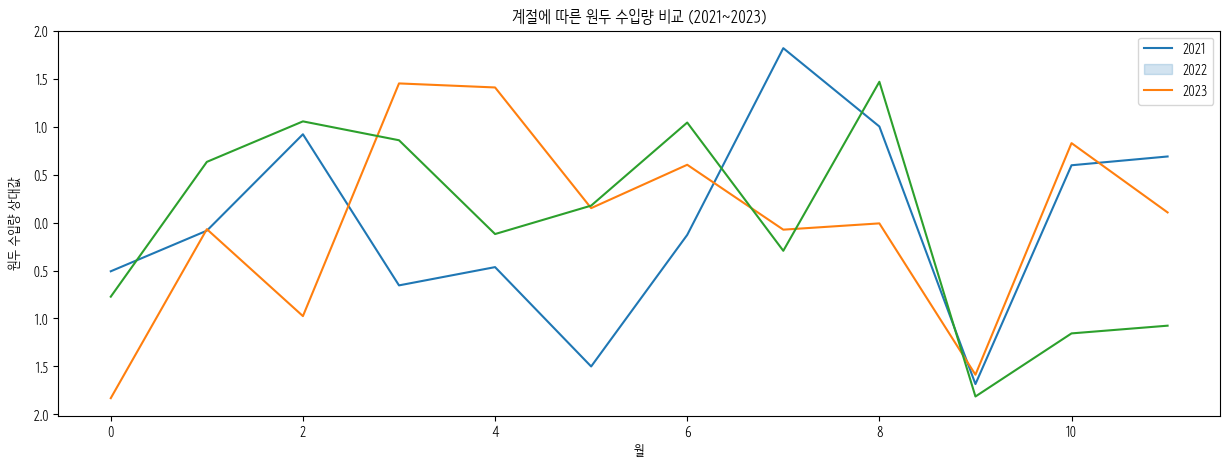

In [ ]:
# 표준화 방식
scaler = StandardScaler()
df_2021 = pd.DataFrame(scaler.fit_transform(df[df['year'] == 2021]['bean'].values.reshape(-1, 1)), columns=['2021'])
df_2022 = pd.DataFrame(scaler.fit_transform(df[df['year'] == 2022]['bean'].values.reshape(-1, 1)), columns=['2022'])
df_2023 = pd.DataFrame(scaler.fit_transform(df[df['year'] == 2023]['bean'].values.reshape(-1, 1)), columns=['2023'])

new_df = pd.concat([df_2021, df_2022, df_2023], axis=1)

new_df['month'] = ['01','02','03','04','05','06','07','08','09','10','11','12']

#그래프 시각화
plt.figure(figsize=(15,5))
sns.lineplot(data=new_df, dashes=False)
plt.title('계절에 따른 원두 수입량 비교 (2021~2023)')
plt.xlabel('월')
plt.ylabel('원두 수입량 상대값')
plt.legend(labels=['2021', '2022', '2023'])
plt.show()

In [ ]:
# 그래프에 필요한 데이터 테이블 생성
df_linear = df[['date','open','closed']]
df_linear = df_linear.set_index('date')

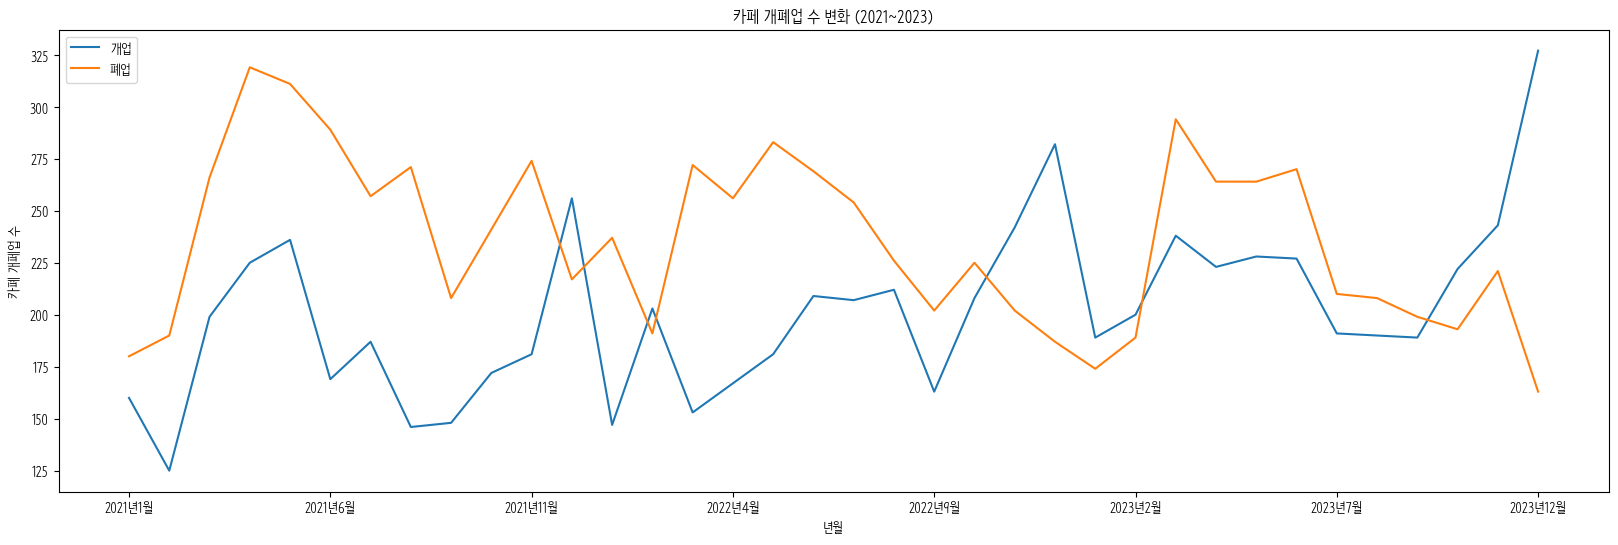

In [ ]:
# 그래프 플로팅
fig = df_linear.plot(figsize=(20, 6))
# 그래프 제목 및 레이블 추가
plt.title('카페 개폐업 수 변화 (2021~2023)')
plt.xlabel('년월')
plt.ylabel('카폐 개페업 수')
# 범례 추가
plt.legend(labels=['개업', '폐업'])
# 그래프 표시
plt.show()

In [ ]:
# 그래프에 필요한 데이터 테이블 생성
df_linear2 = df.loc[df['year']==2022, ['date', 'open', 'closed', 'bean']]

In [ ]:
# 수입량과 카페 개폐업 수 추이를 비교하기 위해 표준화
scaler = MinMaxScaler()
df_linear2_scaled = df_linear2.copy()
columns_to_scale = ['bean', 'open', 'closed']
df_linear2_scaled[columns_to_scale] = scaler.fit_transform(df_linear2_scaled[['bean', 'open', 'closed']])
df_linear2_scaled.set_index('date', inplace= True)

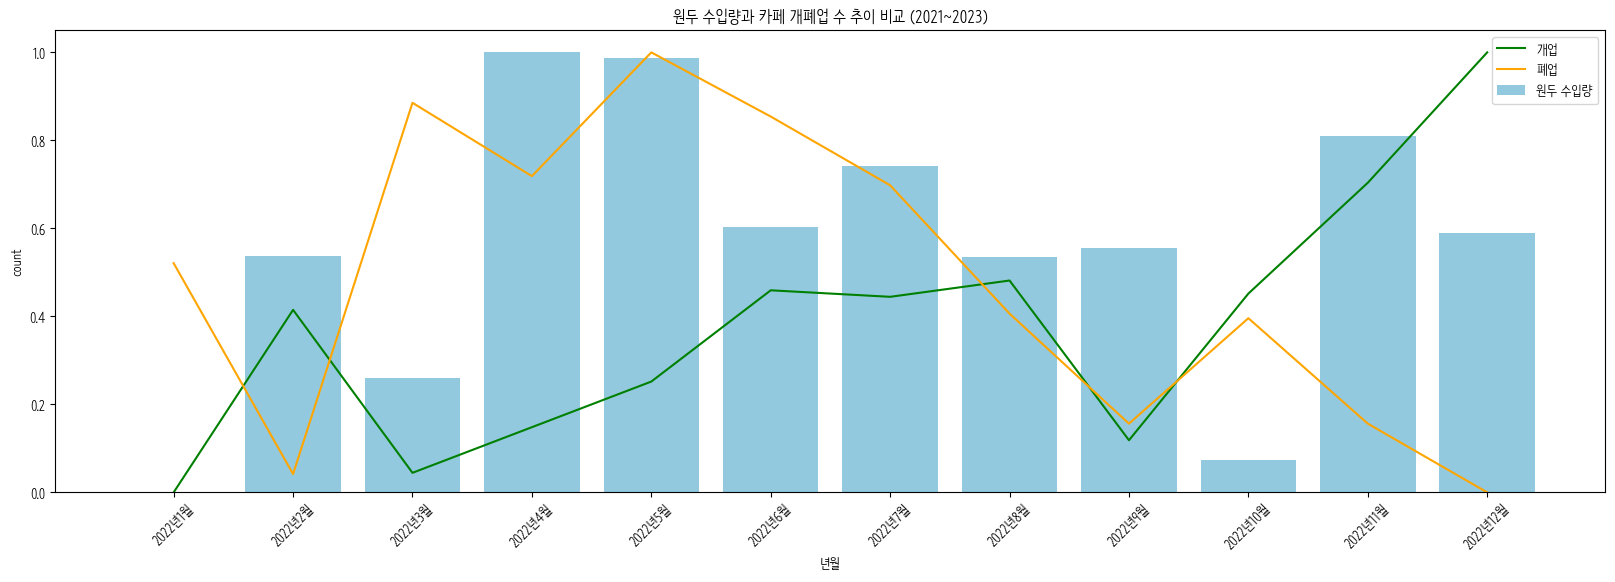

In [ ]:
import matplotlib.pyplot as plt

# 그래프 플로팅
plt.figure(figsize=(20, 6))

# seaborn의 barplot() 함수를 사용하여 커피 수입량 시각화
sns.barplot(data=df_linear2_scaled, x='date', y='bean', color='skyblue', label='원두 수입량')

# pandas의 plot() 함수를 사용하여 개업 및 폐업량 시계열 그래프 시각화
sns.lineplot(data=df_linear2_scaled, x='date', y='open', color='green', label='개업')
sns.lineplot(data=df_linear2_scaled, x='date', y='closed', color='orange', label='폐업')

# 그래프 제목 및 레이블 추가
plt.title('coffee')
plt.xlabel('date')
plt.ylabel('count')

# x축 눈금 각도 설정
plt.xticks(rotation=45)

plt.title('원두 수입량과 카페 개폐업 수 추이 비교 (2021~2023)')
plt.xlabel('년월')

# 범례 추가

plt.show()